<a href="https://colab.research.google.com/github/s1aro0/CPCS433-PROJECT/blob/main/CPCS433_Project_Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Customer Churn Prediction**

This project focuses on predicting customer churn in a telecom company.  
Churn means that a customer decides to stop using the service.

Using the Telco Customer Churn dataset, we:
- Analyze the data
- Build different models to predict if a customer is likely to churn.

This can help the company improve customer retention and make better decisions.


## **1. Importing Required Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

## **2. Loading and Exploring the Data**
This step is for importing the "Telco Customer Churn" dataset from Kaggle and exploring it to understand the data.

The dataset contains 20 features (independent variables) that represent various customer attributes. The target variable is the **Churn** column, which indicates whether a customer has left the service ("Yes") or stayed ("No").


In [ ]:
#loading the data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Print the shape of the data
df.shape

(7043, 21)

The dataset contains 7,043 rows, each representing a customer, and 21 columns in total, including the target variable **Churn**.


In [ ]:
# To show all the columns of the dataset
pd.set_option('display.max_columns', None)

In [ ]:
# Print first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Description**

- **Churn** shows whether the customer left ("Yes") or stayed ("No").
- Service-related columns such as `PhoneService`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` describe the services each customer uses.
- Account details like `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, and `TotalCharges` show how long the customer has been with the company and how they pay.
- Demographic columns such as `gender`, `SeniorCitizen`, `Partner`, and `Dependents` describe basic customer information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Loop through each column to find the unique values for the categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique values in 'gender':
['Female' 'Male']


Unique values in 'Partner':
['Yes' 'No']


Unique values in 'Dependents':
['No' 'Yes']


Unique values in 'PhoneService':
['No' 'Yes']


Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']


Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']


Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']


Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']


Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']


Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']


Unique values in 'StreamingTV':
['No' 'Yes' 'No internet service']


Unique values in 'StreamingMovies':
['No' 'Yes' 'No internet service']


Unique values in 'Contract':
['Month-to-month' 'One year' 'Two year']


Unique values in 'PaperlessBilling':
['Yes' 'No']


Unique values 

<Axes: xlabel='Churn'>

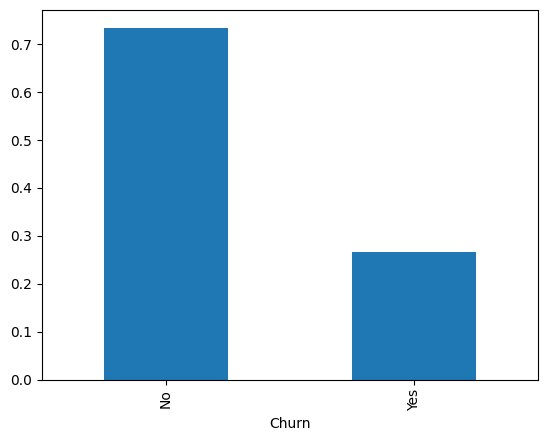

In [ ]:
# Plot the percentage distribution of Churn classes (Yes/No)
df['Churn'].value_counts(normalize=True).plot(kind='bar')

There is class imbalance in the dataset

## **3. Data Preprocessing**

### **1. Handle missing values**

In [ ]:
# Check missing values in each column
print("Number of missing values per column:\n")
print(df.isnull().sum())

Number of missing values per column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Check for empty strings in each column
(df == " ").sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are no null values in the dataset, so they don't appear when using `isnull()`. However, after checking for empty strings, the `TotalCharges` column was found to have 11 empty entries (" "). This is because the column is of object type.



In [ ]:
# Print the rows where 'TotalCharges' is an empty string (" ")
df[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As seen here, when `TotalCharges` is empty, the `tenure` value is 0, meaning these customers are new and haven't been charged yet, which is why `TotalCharges` is empty. So this can be handled by replacing these empty values with 0.


In [ ]:
# Convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
# Replace missing values in 'TotalCharges' with 0.0
df['TotalCharges'].fillna(0.0, inplace=True)

# Check if the missing values are replaced
df.isnull().sum()

/tmp/ipython-input-615975161.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0.0, inplace=True)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### **2. Drop unnecessary columns**
The customer ID column is not needed

In [ ]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Check if the column dropped successfully
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **3. Label encoding of the target column**
The target column `Churn` is of object type with values "Yes" or "No". It needs to be converted to numeric values (1 for "Yes" and 0 for "No").

In [ ]:
# Label encoding (convert the target column to 0 and 1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Churn'].dtype

dtype('int64')

In [ ]:
# Check the unique classes in the target column 'Churn'
print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


There is an imbalance in the dataset, with more customers staying (Churn = 0) than leaving (Churn = 1).


### **4. Visualizing the data**
Visualizing to see the relationship between the features and the target (Churn)

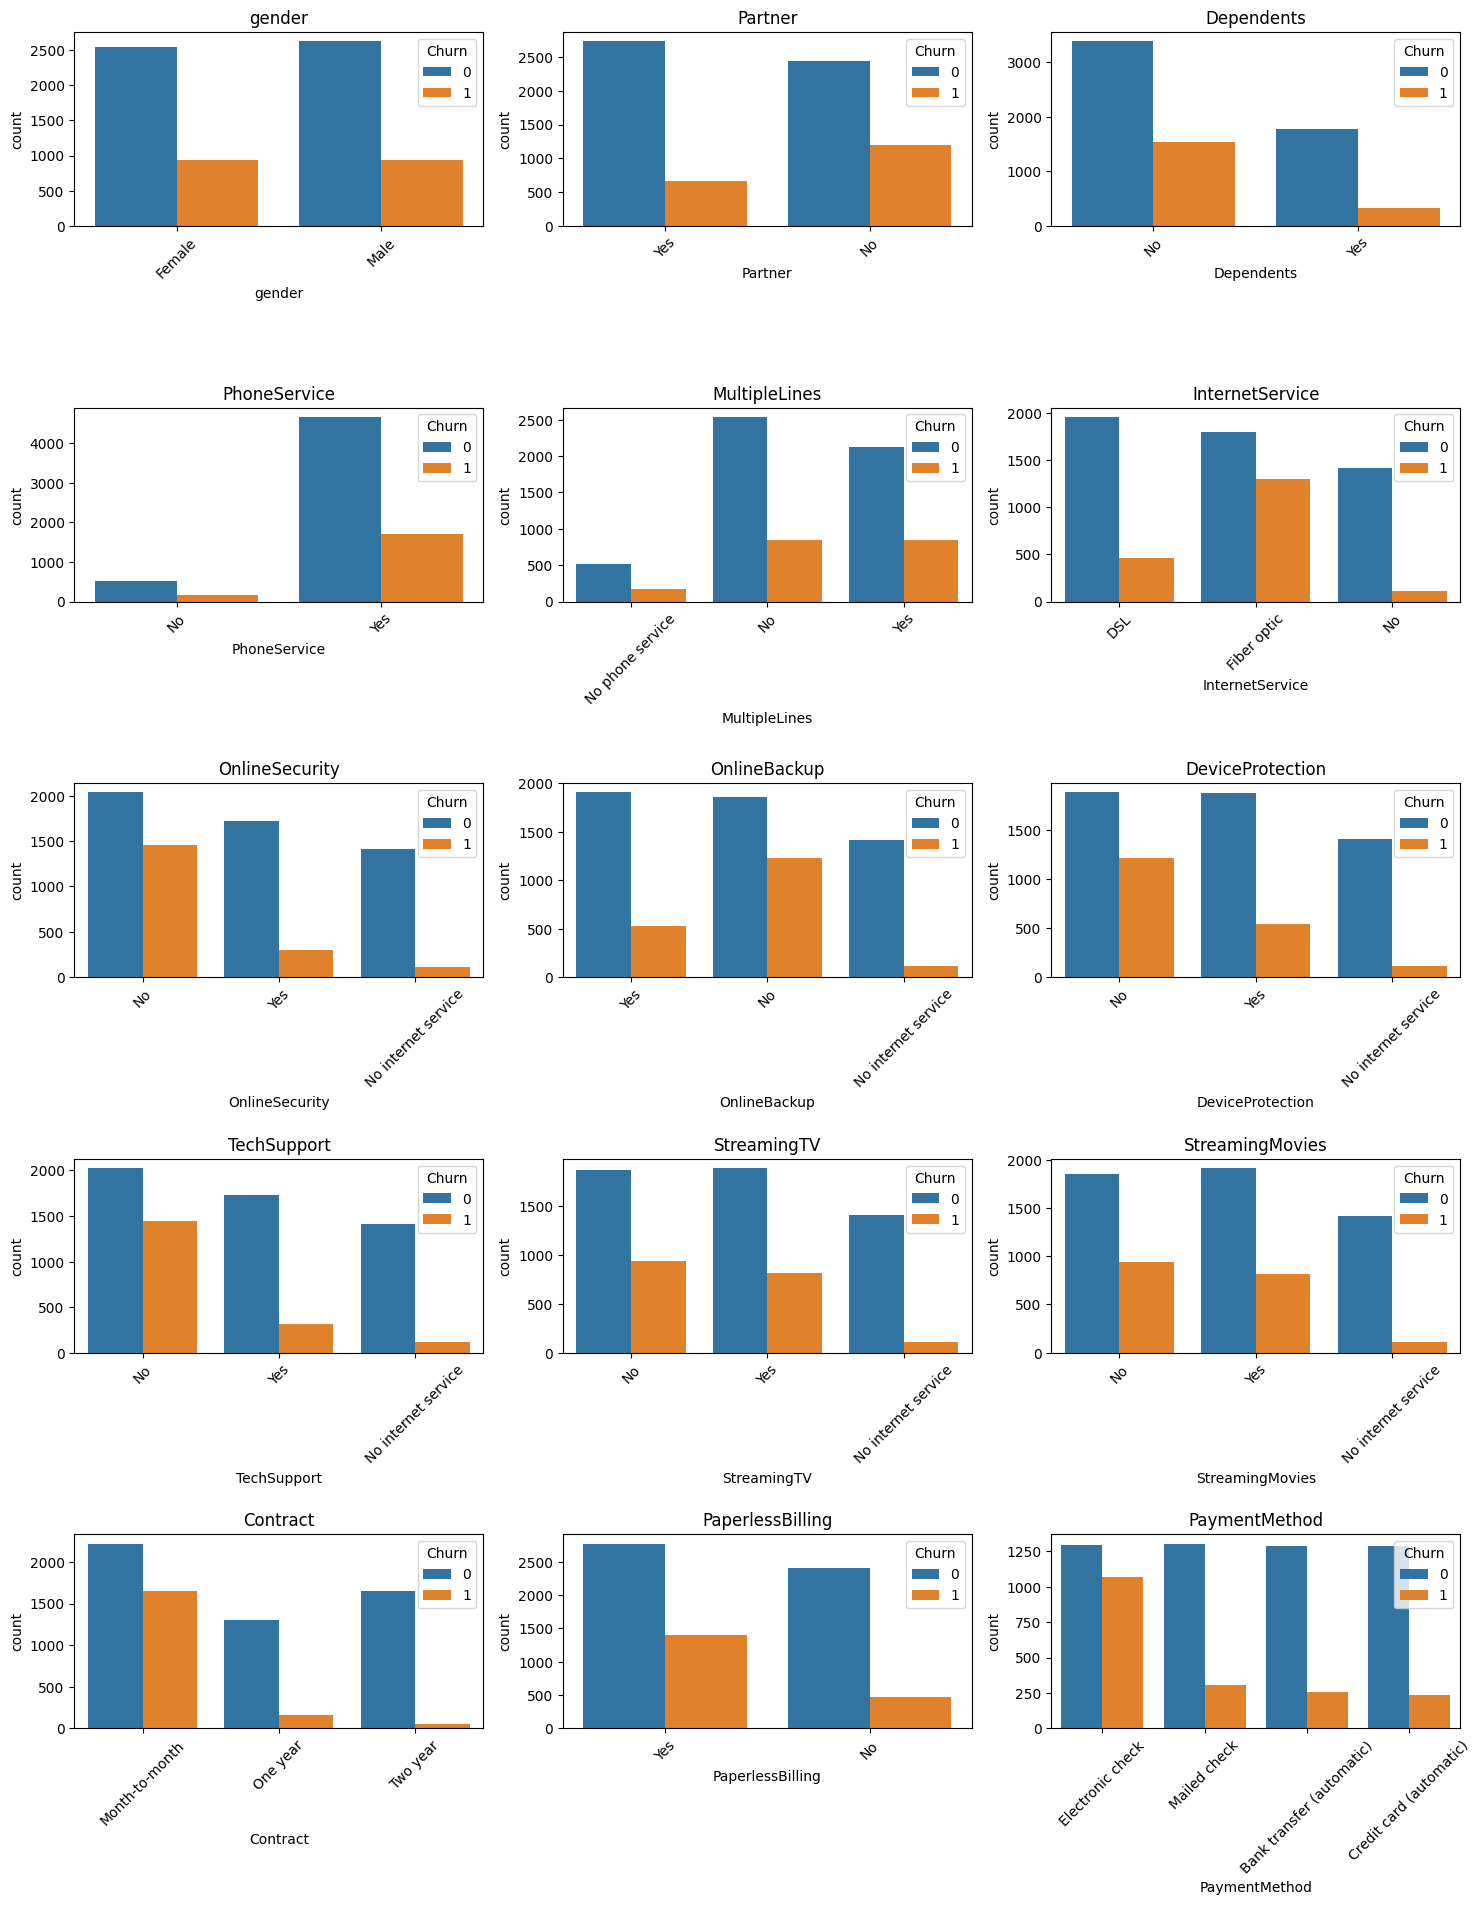

In [ ]:
# Plotting all categorical columns to see how each one relates to Churn
categorical = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 25))

for i, col in enumerate(categorical, 1):
    plt.subplot(7, 3, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

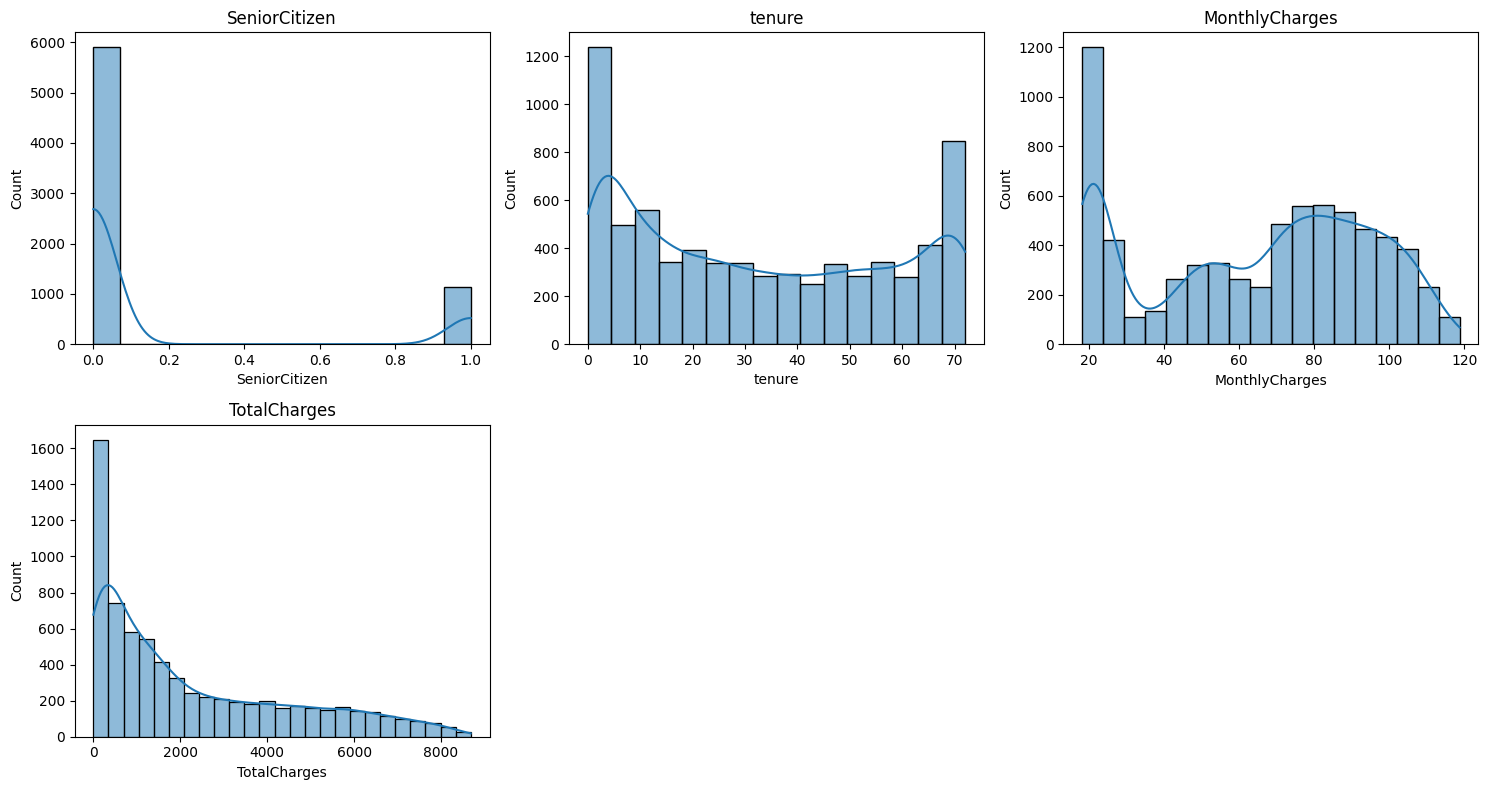

In [ ]:
# Plotting all numerical columns to see how each one relates to Churn
numeric = df.select_dtypes(include=['int64', 'float64']).columns
numeric = numeric.drop('Churn', errors='ignore')  # exclude target

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### **5. Convert categorical columns to numeric**


In [ ]:
# Map Yes/No columns to binary values
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for column in binary_cols:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [ ]:
# Clean service-related columns and convert them to binary values
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in service_cols:
    # Replace service-related 'No internet/phone service' with a simple 'No'
    df[column] = df[column].replace({'No internet service': 'No', 'No phone service': 'No'})

    # Map Yes/No to binary values (Yes = 1, No = 0)
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [ ]:
# Apply One-Hot Encoding to the remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Check the data types
df.dtypes

,0
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64


In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,False,False,False,True,False


In [ ]:
df.shape

(7043, 24)

### **6. Correlation Heatmap**

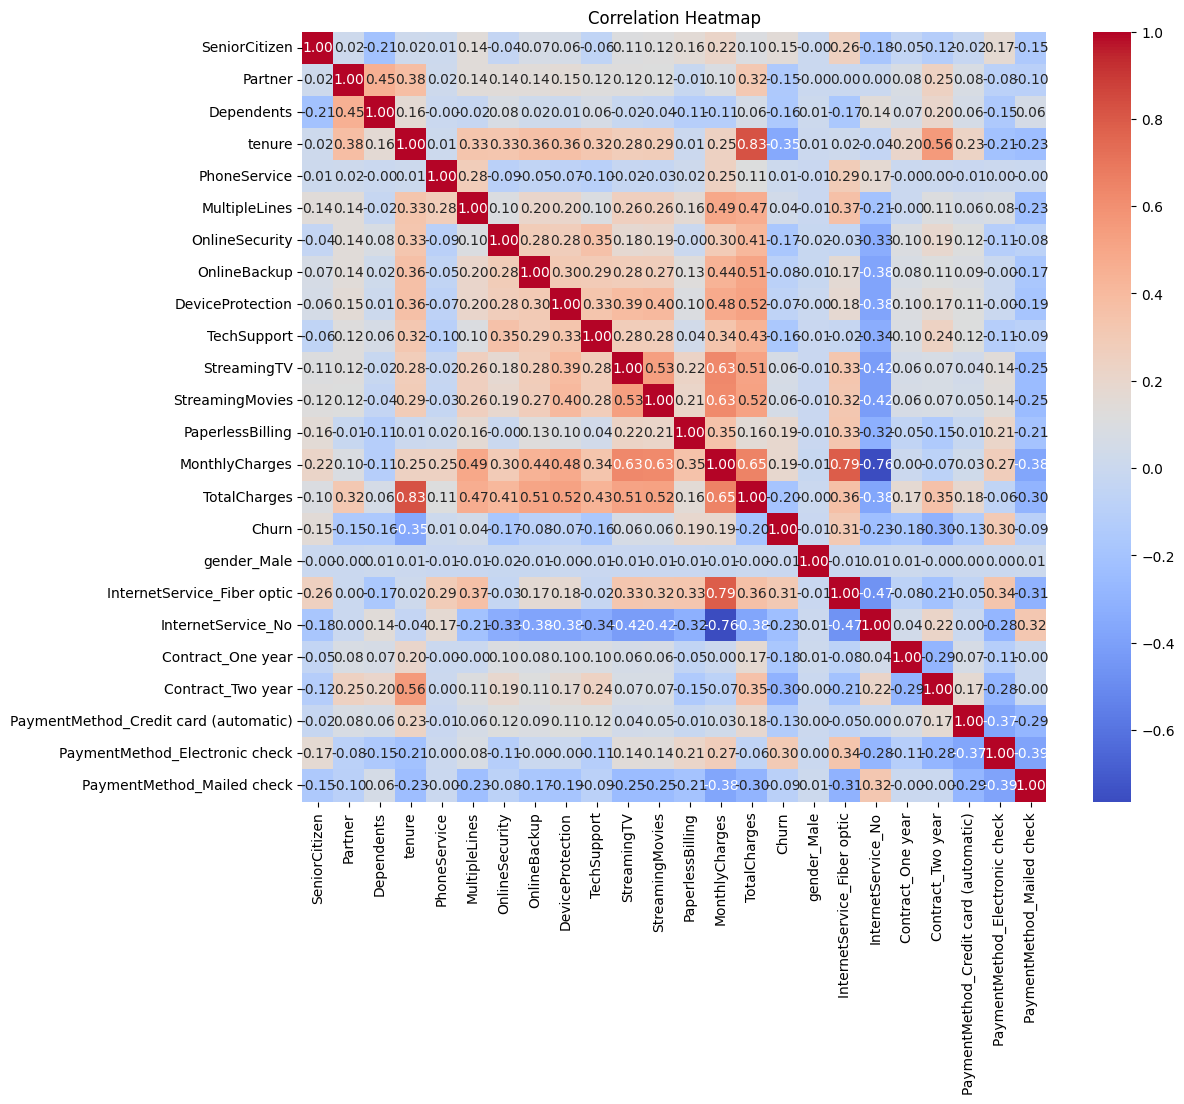

In [ ]:
# Plotting the correlation heatmap after converting all features to numeric
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## **4. Splitting the Data**

In [ ]:
# Split the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7043, 23)
y shape: (7043,)


In [ ]:
# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Print the count of each class
print(y_train.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64


Handle Imbalanced class using Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# Apply SMOTE to balance the classes in the training data (oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Aftre applying SMOTE:")
print(y_train_smote.value_counts())

Aftre applying SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


## **5. Random Forest**

**5.1 Random Forest with default parameters and SMOTE training data**

Initialize the model with default parameters and train it on the SMOTE-resampled training data

In [ ]:
# Initialize the RandomForestClassifier (with default parameter)
RandomForest_model = RandomForestClassifier(
    random_state=42
)

In [ ]:
# Train the model on the SMOTE training data
RandomForest_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

Test and Evaluate the Model

In [ ]:
# Predict on the training data
y_train_pred = RandomForest_model.predict(X_train_smote)

# Train accuracy
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test set
prediction_test = RandomForest_model.predict(X_test)

# Print test accuracy
test_accuracy = metrics.accuracy_score(y_test, prediction_test)
print(f"Test accuracy: {test_accuracy}")

Train Accuracy: 0.9983087702343562
Test accuracy: 0.7750177430801988


As seen, the model shows signs of overfitting: the train accuracy is very high (≈99.8%), while the test accuracy drops to ≈77.5%.

In [ ]:
print('Test Classification Report (Random Forest): ')
print(classification_report(y_test, prediction_test))

Test Classification Report (Random Forest): 
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



Even though accuracy is high, it is not a reliable metric with imbalanced data. The low class-1 recall shows that many churn cases are still not detected, so the focus now is on reducing overfitting and improving recall.

**5.2 Random Forest with hyperparameter tuning and using class weights (without using SMOTE)**

Here, the model was trained on the original training data, and we handled the class imbalance by using class weights instead of SMOTE.

In [ ]:
# Initialize the tuned RandomForest model with class weights to handle imbalance
RF_model_tuned  = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=4,
    min_samples_leaf=2,
    max_leaf_nodes=30,
    class_weight="balanced",
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

In [ ]:
RF_model_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=600, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
# Predict on the training data
y_train_pred_2 = RF_model_tuned.predict(X_train)

# Train accuracy
train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)
print("Train Accuracy:", train_accuracy_2)

# Predict on the test data
prediction_test_2 = RF_model_tuned.predict(X_test)

# Test accuracy
test_accuracy_2 = accuracy_score(y_test, prediction_test_2)
print("Test Accuracy:", test_accuracy_2)

Train Accuracy: 0.778665246716365
Test Accuracy: 0.7579843860894251


The overfitting issue was reduced after using class weights instead of SMOTE, along with tuning the model parameters. The train and test accuracies are now much closer.

In [ ]:
print('Test Classification Report (Random Forest):')
print(classification_report(y_test,  prediction_test_2))

Test Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.78      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



The model achieves high recall for class 1, which helps in detecting churn cases, but this also increases false positives — a reasonable trade-off with imbalanced data.
Using class weights contributes to this behavior because the model gives more importance to the minority class (class 1).

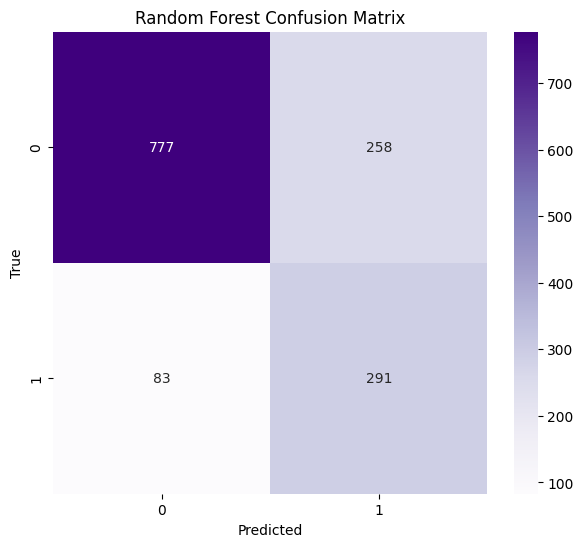

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, prediction_test_2)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

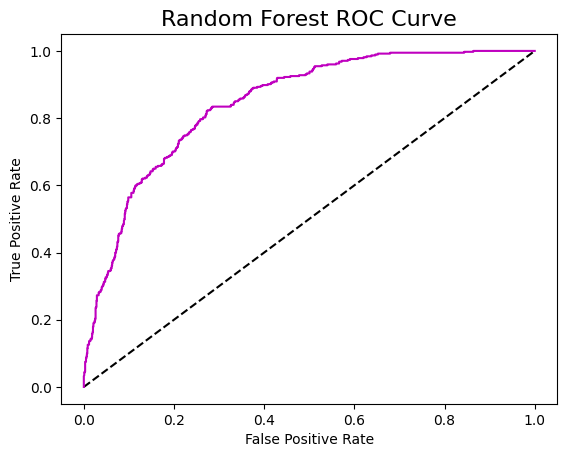

In [ ]:
# Plotting the ROC Curve
y_rfpred_prob = RF_model_tuned.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='m')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## **6. XGBoost Model**  

In [ ]:
!pip install xgboost --quiet
from xgboost import XGBClassifier

**6.1 XGBoost Trained on SMOTE Training Data**

In [ ]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

In [ ]:
# Train the model on the entire training set
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the training data
y_train_pred = xgb_model.predict(X_train_smote)

# Train accuracy
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test set
prediction_test = xgb_model.predict(X_test)

# Print test accuracy
test_accuracy = metrics.accuracy_score(y_test, prediction_test)
print(f"Test accuracy: {test_accuracy}")

Train Accuracy: 0.9508335346702101
Test accuracy: 0.7750177430801988


like randomeFoest, the model shows signs of overfitting: the train accuracy is very high (≈95.08%), while the test accuracy drops to ≈77.5%.

In [ ]:
# Make predictions on the test set
xgb_prediction_test = xgb_model.predict(X_test)

print('Test Classification Report (XGBoost):')
print(classification_report(y_test, xgb_prediction_test))


Test Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



**6.2 XGBoost Trained on Original Training Data (without SMOTE)**

In [ ]:
# Count the number of non-churn samples (class 0)
neg = np.sum(y_train == 0)

# Count the number of churn samples (class 1)
pos = np.sum(y_train == 1)

# Compute scale_pos_weight to handle class imbalance
scale_pos_weight = neg / pos

# Using XGBoost with tuning, regularization, and subsampling to reduce overfitting
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    max_depth=3,
    learning_rate=0.03,
    n_estimators=400,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=3.0,
    reg_alpha=1.0,
    scale_pos_weight=scale_pos_weight
)

# Train the model on the original training data (without SMOTE)
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Predict on the test set
xgb_prediction_test = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, xgb_prediction_test)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.7731629392971247
Test Accuracy: 0.7444996451383961


Train and test accuracy are now closer, showing less overfitting


In [ ]:
print('Test Classification Report (XGBoost):')
print(classification_report(y_test, xgb_prediction_test))

Test Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.74      0.76      1409



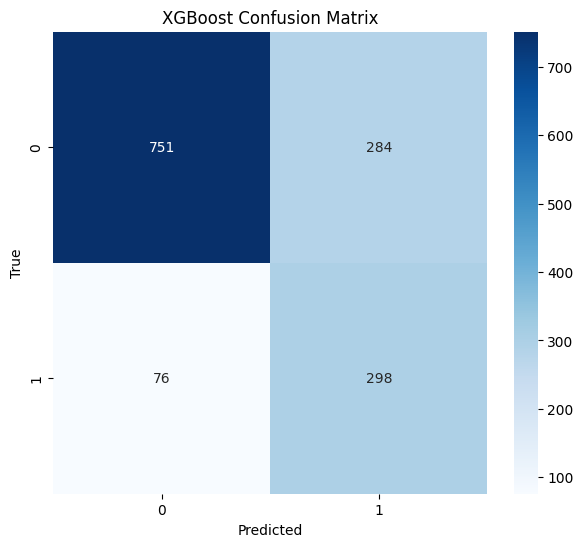

In [ ]:
# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_prediction_test)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()


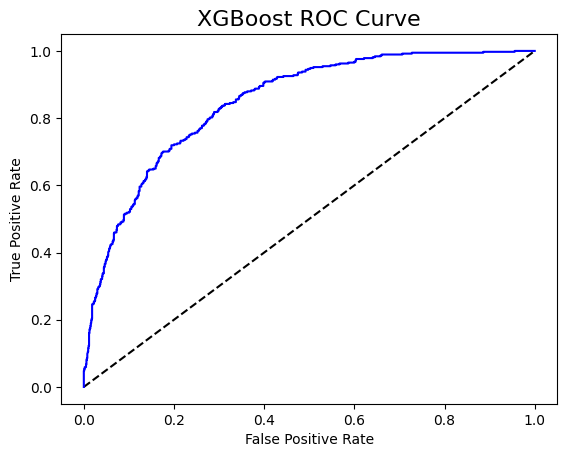

In [ ]:
# Plotting the ROC Curve
y_xgb_pred_prob = xgb_model.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_xgb_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', color="b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve', fontsize=16)
plt.show()

## Feature Importance Analysis

In [ ]:
# Get feature importances from the tuned XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a pandas Series for better visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
display(features_df.head(10))

Top 10 Most Important Features:


,Feature,Importance
19,Contract_Two year,0.285124
18,Contract_One year,0.147119
16,InternetService_Fiber optic,0.135192
17,InternetService_No,0.072764
21,PaymentMethod_Electronic check,0.059175
3,tenure,0.043006
11,StreamingMovies,0.027870
6,OnlineSecurity,0.025783
12,PaperlessBilling,0.025396
9,TechSupport,0.022990


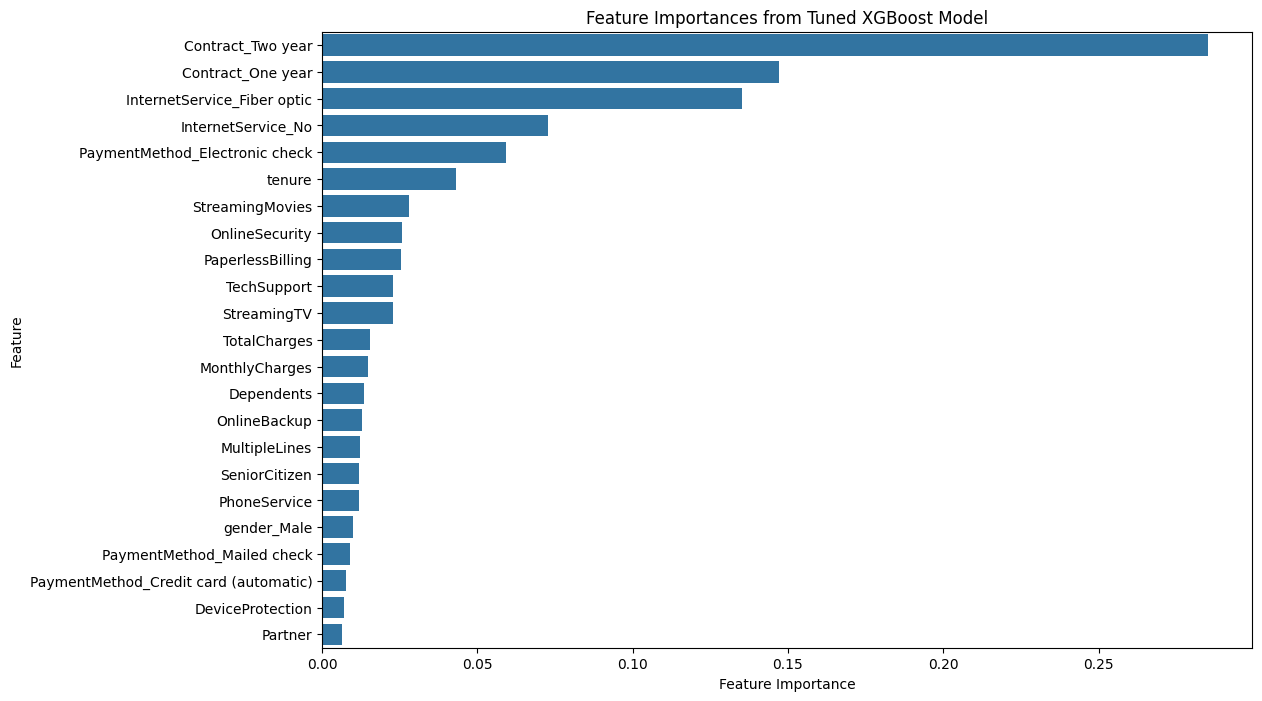

In [ ]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Tuned XGBoost Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

From the feature importance plot, we can observe which features are most influential in the XGBoost model's prediction of customer churn.

## **7. Logistic Regression**  

In [ ]:
# as all categorical columns have already been converted to numeric/boolean types.
numeric_features = X_train.columns.tolist()

In [ ]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    [('num', numeric_transformer, numeric_features)],
    remainder='passthrough' # Ensure no other columns are dropped if present
)

In [ ]:
# Model Pipline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(
        solver='liblinear',
        max_iter=500
    ))
])

In [ ]:
# Train the pipeline model on the SMOTE training data
model.fit(X_train_smote, y_train_smote)

# Predict on the training data using the pipeline
y_train_pred_pipeline = model.predict(X_train_smote)

# Train accuracy
train_accuracy_pipeline = accuracy_score(y_train_smote, y_train_pred_pipeline)
print(f"Pipeline Logistic Regression Train Accuracy: {train_accuracy_pipeline:.4f}")

# Make predictions on the test set
prediction_test_pipeline = model.predict(X_test)

# Test accuracy
test_accuracy_pipeline = accuracy_score(y_test, prediction_test_pipeline)
print(f"Pipeline Logistic Regression Test Accuracy: {test_accuracy_pipeline:.4f}")

Pipeline Logistic Regression Train Accuracy: 0.8227
Pipeline Logistic Regression Test Accuracy: 0.7630


Let's try with Original X,y Train, and using class weights to handle imbalance instead of SMOTE

In [ ]:
# Model Pipline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(
        solver='liblinear',
        max_iter=500,
        class_weight='balanced' # To handle the imbalance, since the original x, y train data will be used here
    ))
])

In [ ]:
# Train the pipeline model on the original (unprocessed) training data
model.fit(X_train, y_train)

# Predict on the training data using the pipeline
y_train_pred_pipeline = model.predict(X_train)

# Train accuracy
train_accuracy_pipeline = accuracy_score(y_train, y_train_pred_pipeline)
print(f"Pipeline Logistic Regression Train Accuracy: {train_accuracy_pipeline:.4f}")

# Make predictions on the original (unprocessed) test set
prediction_test_pipeline = model.predict(X_test)

# Test accuracy
test_accuracy_pipeline = accuracy_score(y_test, prediction_test_pipeline)
print(f"Pipeline Logistic Regression Test Accuracy: {test_accuracy_pipeline:.4f}")

Pipeline Logistic Regression Train Accuracy: 0.7520
Pipeline Logistic Regression Test Accuracy: 0.7381


In [ ]:
print('Test Classification Report (Pipeline Logistic Regression):')
print(classification_report(y_test, prediction_test_pipeline))

Test Classification Report (Pipeline Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



Less accuracy, but recall for class 1 improved

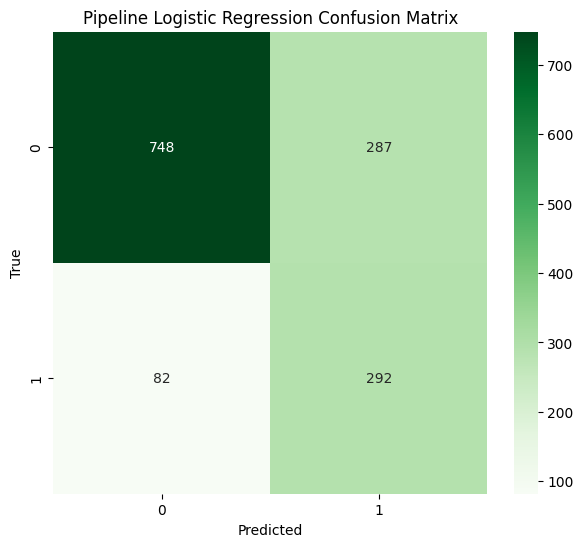

In [ ]:
# Generate the confusion matrix
cm_pipeline_log_reg = confusion_matrix(y_test, prediction_test_pipeline)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(cm_pipeline_log_reg, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Pipeline Logistic Regression Confusion Matrix')
plt.show()

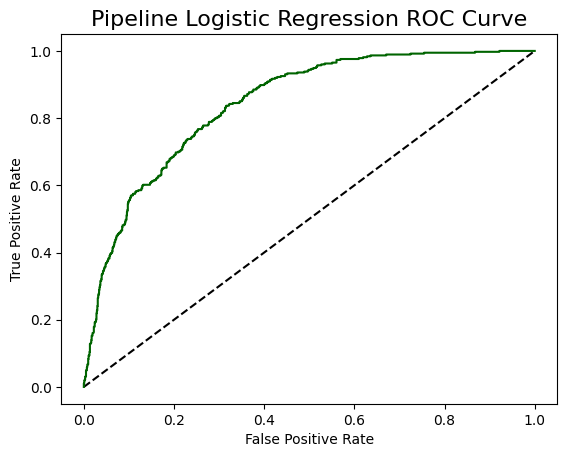

In [ ]:
# Plotting the ROC Curve
y_pipeline_log_reg_pred_prob = model.predict_proba(X_test)[:,1]
fpr_pipeline_log_reg, tpr_pipeline_log_reg, thresholds_pipeline_log_reg = roc_curve(y_test, y_pipeline_log_reg_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_pipeline_log_reg, tpr_pipeline_log_reg, label='Pipeline Logistic Regression', color="darkgreen")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Pipeline Logistic Regression ROC Curve', fontsize=16)
plt.show()